# Oscilloskope USBTCM utility

In [1]:
import matplotlib.pyplot as plt
import sys
import os
import time
import h5py
import numpy as np

class UsbTmcDriver:

    def __init__(self, device):
        self.device = device
        self.FILE = os.open(device, os.O_RDWR)
 
    def write(self, command):
        os.write(self.FILE, command);
 
    def read(self, length = 400):
        return os.read(self.FILE, length)
 
    def getName(self):
        self.write("*IDN?")
        return self.read(300)
 
    def sendReset(self):
        self.write("*RST")  # Be carefull, this real resets an oscilloscope

# Looking for USBTMC device
def getDeviceList(): 
    dirList=os.listdir("/dev")
    result=list()

    for fname in dirList:
        if(fname.startswith("usbtmc")):
            result.append("/dev/" + fname)

    return result

# looking for oscilloscope
devices =  getDeviceList()
# initiate oscilloscope
osc = UsbTmcDriver(devices[0])


/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Read number of waveforms and wtite it to a file

<IPython.core.display.Javascript object>


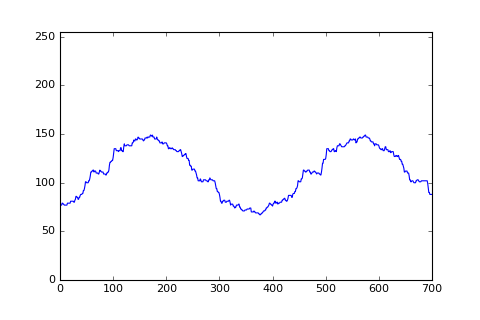

XINC: 5e-05
YINC: 2e-05


In [48]:
%matplotlib notebook
fig,ax = plt.subplots(1,1)

osc.write(':WAV:XINC?')
xinc = float(osc.read(100))
print 'XINC:', xinc
osc.write(':WAV:YINC?')
yinc = float(osc.read(100))
print 'YINC:', yinc

with h5py.File('data.h5', 'w') as hf:
    hf.create_dataset('XINC', data=(xinc))
    hf.create_dataset('YINC', data=(yinc))
    #hf.create_dataset('YINC', bytearray(yinc))
    for n in range(10):
        #osc.write(':RUN')
        # waiting for SINGLE trigger
        osc.write(':SING')
        osc.write(':TRIG:STAT?')
        while (osc.read(4) != 'STOP'):
            osc.write(':TRIG:STAT?')
        time.sleep(0.4)

        #osc.write(':STOP')
        osc.write(':WAV:SOUR CHAN1')
        osc.write(':WAV:MODE NORM')
        osc.write(':WAV:FORM BYTE')
        osc.write(':WAV:POIN 700')
        osc.write(':WAV:DATA?')
        wave1 = bytearray(osc.read(500))
        wave2 = bytearray(osc.read(500))
        wave = np.concatenate((wave1[11:],wave2[:(700-489)]))
        #osc.write(':WAV:RES')
        hf.create_dataset(str(n), data=wave)
        fig.clf()
        plt.ylim(0, 255)
        plt.plot(wave)
        fig.canvas.draw()

 

## Read waveforms from the file

XINC: 5e-05    YINC: 2e-05
64 152 79418
65 150 79029
65 152 78805
65 151 78512
69 149 79116
69 151 79632
67 151 79372
69 149 79266
68 150 79386
67 149 78285


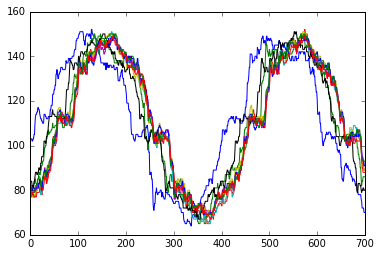

In [49]:
%matplotlib inline 

with h5py.File('data.h5','r') as hf:
    #print('List of arrays in this file: \n', hf.keys())
    print 'XINC:', np.array(hf.get('XINC')), '   YINC:', np.array(hf.get('YINC'))
    for n in range(10):
        data = hf.get(str(n))
        np_data = np.array(data)
        plt.plot(np_data)
        #print np_data
        maximum = 0
        minimum = 255
        suma = 0
        for i in range(700):
            if np_data[i] > maximum:
                maximum = np_data[i]
            if np_data[i] < minimum:
                minimum = np_data[i]
            suma = suma + np_data[i]
        print minimum, maximum, suma


In [33]:
wave2

bytearray(b'qqqty~~\x7f\x7f~~\x7f\x83\x89\x89\x8b\x8b\x8a\x8a\x88\x88\x87\x87\x8a\x8a\x8b\x8b\x8a\x8a\x89\x89\x8a\x8e\x8f\x8f\x8c\x8c\x8e\x8e\x8b\x8b\x8d\x8d\x8c\x8c\x8c\x8c\x8d\x8d\x8f\x90\x91\x91\x91\x91\x91\x91\x92\x92\x91\x91\x92\x92\x91\x91\x92\x92\x92\x91\x91\x91\x91\x91\x91\x91\x92\x92\x91\x91\x94\x94\x95\x95\x97\x97\x97\x97\x93\x93\x94\x94\x94\x94\x93\x93\x91\x91\x92\x92\x91\x91\x91\x91\x8f\x8c\x8b\x8b\x8b\x8b\x8b\x8b\x8b\x8a\x8a\x8a\x88\x88\x8a\x8a\x88\x88\x88\x87\x87\x87\x85\x85\x84\x84\x85\x85\x85\x86\x85\x85\x87\x87\x86\x86\x84\x80~~\x7f\x7f\x7f\x7f\x7f\x7f\x7f\x7f{{yyxxvtooqqqqnnnmhhffhhgfeeeeffgggihhiiiihhhhhhhhggda^^]]\\\\ZVRRQQQQSSSRRRRRQQQQQLKKNNNNMNOOPPOOMMKJHHGGHHIKMMNNKKIIHIJJJJHHIJJJIIFFEEFEEEEEGGHIHHHHIIKKLNPPOOOONMNNPPOOQQRRSSTTUUVVVUUUTTTTVZ[[[[\\\\]]ZY\\\\``bbbehhggggkkmnrrqqrrssqqrrqqooooppooooomnnoonnooquyy{{||}\x80\x87\x87\x87\x87\x87\x87\x85\x85\x84\x85\x87\x87\x87\x87\x86\x86\x86\x86\x87\x8a\x8c\x8c\x89\x89\x8a\x8a\x8b\x8a\x8b\x8b\x8a\x8a\x8b\x8b\x8c\x8c\x

## Capture waveforms and plot it

<IPython.core.display.Javascript object>


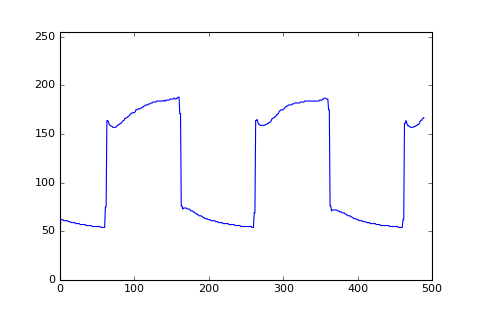

In [98]:
%matplotlib notebook

fig,ax = plt.subplots(1,1)

# looking for oscilloscope
devices =  getDeviceList()
# initiate oscilloscope
osc = UsbTmcDriver(devices[0])

df = pd.Series(0) # Create a new dataframe

for n in range(10):
    # waiting for SINGLE trigger
    osc.write(':SINGLE')
    osc.write(':TRIG:STAT?')
    while (osc.read(4) != 'STOP'):
        osc.write(':TRIG:STAT?')

    #osc.write(':STOP')
    osc.write(':WAV:SOUR CHAN1')
    osc.write(':WAV:MODE NORM')
    osc.write(':WAV:FORM BYTE')
    osc.write(':WAV:DATA?')

    #wave = map(float, osc.read(100).split(','))
    wave = bytearray(osc.read(1400))

    fig.clf()
    plt.ylim(0, 255)
    plt.plot(wave[10:])
    fig.canvas.draw()
    time.sleep(0.1)
